In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_excel('toyota_data4.xlsx') #read from dataset

data.head() # view first few rows of the data

,x,r
0,23.0,13500
1,23.0,13750
2,24.0,13950
3,26.0,14950
4,30.0,13750


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1336 non-null   float64
 1   r       1436 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 22.6 KB


In [62]:
data = data.dropna()

In [63]:
size = data['x'].size

Text(0.5, 1.0, 'Scatter')

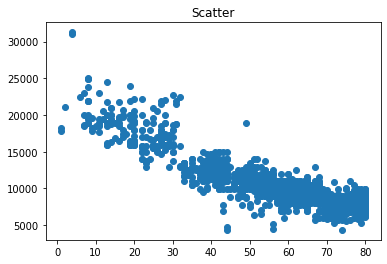

In [64]:
plt.scatter(data['x'],data['r'])
plt.title('Scatter')

In [65]:
data['x_sqr'] = data['x']**2
data

,x,r,x_sqr
0,23.0,13500,529.0
1,23.0,13750,529.0
2,24.0,13950,576.0
3,26.0,14950,676.0
4,30.0,13750,900.0
...,...,...,...
1429,78.0,8950,6084.0
1430,80.0,8450,6400.0
1432,72.0,10845,5184.0
1434,70.0,7250,4900.0


In [66]:
data['r_sqr'] = data['r']**2
data

,x,r,x_sqr,r_sqr
0,23.0,13500,529.0,182250000
1,23.0,13750,529.0,189062500
2,24.0,13950,576.0,194602500
3,26.0,14950,676.0,223502500
4,30.0,13750,900.0,189062500
...,...,...,...,...
1429,78.0,8950,6084.0,80102500
1430,80.0,8450,6400.0,71402500
1432,72.0,10845,5184.0,117614025
1434,70.0,7250,4900.0,52562500


In [67]:
data['xr'] = data['x']*data['r']

In [68]:
data

,x,r,x_sqr,r_sqr,xr
0,23.0,13500,529.0,182250000,310500.0
1,23.0,13750,529.0,189062500,316250.0
2,24.0,13950,576.0,194602500,334800.0
3,26.0,14950,676.0,223502500,388700.0
4,30.0,13750,900.0,189062500,412500.0
...,...,...,...,...,...
1429,78.0,8950,6084.0,80102500,698100.0
1430,80.0,8450,6400.0,71402500,676000.0
1432,72.0,10845,5184.0,117614025,780840.0
1434,70.0,7250,4900.0,52562500,507500.0


In [69]:
(sum(data['x_sqr'])-(sum(data['x'])**2/size))

461350.4041916169

In [70]:
w1 = (sum(data['xr']) - sum(data['x'])*sum(data['r']/size)) / (sum(data['x_sqr'])-(sum(data['x'])**2/size))
w1

-170.94936688237877

In [71]:
w0 = sum(data['r'])/size - w1*sum(data['x'])/size
w0

20267.598061360455

In [72]:
predicted = w0+w1*data['x']

In [73]:
predicted

0       16335.762623
1       16335.762623
2       16164.813256
3       15822.914522
4       15139.117055
            ...     
1429     6933.547445
1430     6591.648711
1432     7959.243646
1434     8301.142380
1435     7275.446178
Name: x, Length: 1336, dtype: float64

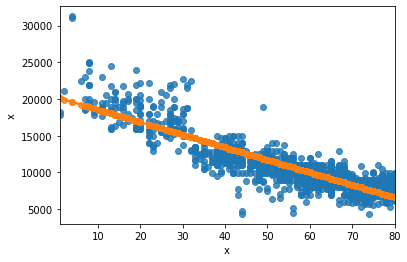

In [81]:

sns.regplot(x = 'x',y = 'r',data = data,fit_reg=False)#.set(xlim=(0,100),ylim=(0,500))

sns.regplot(x = 'x',y = predicted,data = data)


In [75]:
error = np.sum((data['r']-predicted)**2)/size

In [76]:
error

2987200.437131624